#Необходимые библиотеки

In [42]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Импорт датасета

In [46]:
asteroid_df = pd.read_csv('/content/asteroid.csv') 
asteroid_df.head

<bound method NDFrame.head of       POP       Dnu      numax  epsilon
0       1   4.44780   43.06289    0.985
1       0   6.94399   74.07646    0.150
2       1   2.64571   21.57891    0.855
3       1   4.24168   32.13189    0.840
4       0  10.44719  120.37356    0.275
...   ...       ...        ...      ...
996     0   5.51582   49.99920    0.060
997     1   4.14823   32.09069    0.930
998     1   3.98294   30.90257    0.880
999     1   4.33893   45.62183    0.975
1000    1   3.74869   37.94907    0.205

[1001 rows x 4 columns]>

#Описываем модель

In [47]:
model = KMeans (n_clusters=3)

#Проводим моделирование

In [48]:
model.fit(asteroid_df)

KMeans(n_clusters=3)

#Добавим в исходный набор новый столбец с номером кластера наблюдения 

In [49]:
asteroid_df['cluster']=model.fit_predict(asteroid_df)
asteroid_df.head()

,POP,Dnu,numax,epsilon,cluster
0,1,4.44780,43.06289,0.985,0
1,0,6.94399,74.07646,0.150,2
2,1,2.64571,21.57891,0.855,0
3,1,4.24168,32.13189,0.840,0
4,0,10.44719,120.37356,0.275,2


#Добавим в исходный набор новый столбец, преобразовав категориальную переменную в фактор

In [52]:
asteroid_df['size']=model.fit_predict(asteroid_df)
asteroid_df.head()
asteroid_df ['size'] = pd.factorize ( asteroid_df ['size'] ) [0]
asteroid_df.head()

,POP,Dnu,numax,epsilon,cluster,size
0,1,4.44780,43.06289,0.985,0,0
1,0,6.94399,74.07646,0.150,2,1
2,1,2.64571,21.57891,0.855,0,0
3,1,4.24168,32.13189,0.840,0,0
4,0,10.44719,120.37356,0.275,2,1


#Строим график

Text(0, 0.5, 'epsilon')

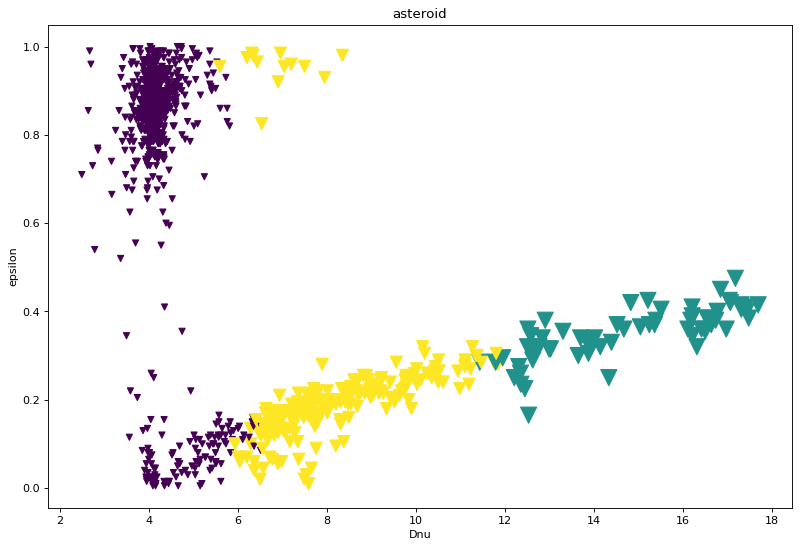

In [63]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(asteroid_df['Dnu'], asteroid_df['epsilon'], c= asteroid_df['cluster'], s=30*(3*asteroid_df['size']+1), marker = "v")

plt.title('asteroid')
plt.xlabel('Dnu')
plt.ylabel('epsilon')

#Составим по данным класса и кластера сводную таблицу

In [64]:
asteroid_df.groupby(['cluster','size']) ['cluster'].count().unstack()

size,0,1,2
cluster,,,
0,730.0,NaN,NaN
1,NaN,NaN,64.0
2,NaN,207.0,NaN


#Подключим методы

In [66]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Разбиваем исходное множество данных на тренировочную и тестовую выборки (в соотношении 7/3) и соответствующие им верные значения классов

In [67]:
train_data, test_data, train_labels, test_labels = train_test_split(
   asteroid_df[['POP', 'Dnu', 'numax', 'epsilon']],
   asteroid_df[['size']], test_size = 0.3, random_state = 69)
model = KMeans(n_clusters=3)

#Проводим класстеризацию на тренировочной выборке

In [68]:
model.fit(train_data)

KMeans(n_clusters=3)

#Определяем кластеры по построенной модели на тестовых данных

In [69]:
model_predictions = model.predict(test_data)

#С помощью метрики accuracy сравниваем предсказанные значения с исходной классификацией тестовой выборки

In [70]:
accuracy_score(test_labels, model_predictions)

0.7043189368770764

#Отчет по качеству

In [71]:
print(classification_report(test_labels, model_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       0.00      0.00      0.00        62
           2       0.00      0.00      0.00        27

    accuracy                           0.70       301
   macro avg       0.33      0.33      0.33       301
weighted avg       0.70      0.70      0.70       301

